# Image Classification: Computer Vision and Transfer Learning

# I. Computer Vision: Deep Learning Era

## I.1 AlexNet: the game changer

Historically, convolutional neural networks were not always famous. Yann Le Cun, commonly admitted as one of the creators of this technique, is now a rock star in AI, but had rough years in academic research in the past.

CNNs really exploded with [AlexNet](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) in 2012, a CNN that made a breakthrough in the Computer Vision field. 

![](images/image_net_error.png)

The architecture of AlexNet is the following:

![](images/AlexNet-1.png)

The architecture is the following:
* Convolutional layer of 11x11 with 96 filters and stride of 4
* Max pooling layer of 3x3 with stride of 2
* Convolutional layer of 5x5 with 256 filters
* Max pooling layer of 3x3 with stride of 2
* Convolutional layer of 3x3 with 384 filters
* Convolutional layer of 3x3 with 384 filters
* Convolutional layer of 3x3 with 256 filters
* Max pooling layer of 3x3 with stride of 2
* Fully connected layer of 4096 units
* Fully connected layer of 4096 units
* Output: fully connected softmax layer of 1000 units (1 units per class)

Since then, CNNs are quite popular and widely used in the Computer Vision: many new powerful architectures have been proposed. Let's see some of them.

## I.2 VGG

VGG is one the best architectures of the 2014 image net challenge. It has 16 layers, with the following architecture:

![](images/VGG16_layers.png)

If you want to reuse the VGG architecture, it has been made very user friendly within Keras.

The object VGG16 exists with the following signature:
```python
keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
```

So that one can define a VGG16 architecture with just one line of code.

Even better, you can reuse the weights of the network trained on the image net challenge!

## I.3 ResNet

ResNet (for Residual Network) is the winner of the 2015 image net challenge.

It was a mini revolution, introducing for the first time the residual blocks:

![](images/residual_block.png)

Residual blocks are just skip connections: the network can choose to skip one or more layers, if it's better for the learning to do so.

The main advantage is that it help learning over very deep networks: at worst, nothing is learnt, but the information keep going forward!

There were several versions of the ResNet, with several depth: 50, 101 and 152 layers. All are available in Keras for easy implementation:
```python
keras.applications.resnet.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
keras.applications.resnet.ResNet101(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
keras.applications.resnet.ResNet152(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
```

Again, they are available with weights trained on the image net challenge, which is really convenient for training!

## I.4 Other architectures

There are plenty of other architectures that are quite famous, and that can be used. Many of them are available in Keras [here](https://keras.io/applications/):
- Inception
- MobileNet
- DenseNet
- ...

# II. Neural Networks Optimization & Regularization

## II.1 Epochs and Minibatch Size

The number of epochs is the number of time all samples are used to train your neural network. Basically, the more you have epochs, the more your neural network is trained on your data and knows it well.

The minibatch size is the number of samples used to update the parameters (weights and bias) of your neural network.

Below is a representation of the convergence of an gradient descent for three extreme sizes of minibatch:
* stochastic means minibatch size = 1
* batch means minibatch size is the all the samples
* minibatch is in between

Each point represent an update of the parameters.

![](images/minibatch_vs_batch.png)

To summarize this:
- Stochastic might be noisy
- Batch can take longer to reach minimum
- Mini-batch is a tradeoff: a bit noisy but quite fast to converge

To sum up, it is recommended to use minibatch gradient descent, with typical minibatch size between 32 and 256. This is chosen when fitting a model with the paramter `batch_size`.

## II.2 Learning Rate

Would not recommend to play with this hyperparameter at first, but you can try to fine tune it to achieve the best possible results. The learning rate should allow you to reach the global minimum on such a curve:

![](images/loss_plot.png)

As you can imagine, there are three possibilities:
- A very small learning rate: you might be stuck in the local minimum
- A very large learning rate: you might overshoot the global minimum
- A reasonable learning rate: you will endup in the global minimum

The following plot shows the potentiel impact of the learning rate on the loss (and thus the accuracy of your model).

![](images/lr_epochs.png)

This is just a schematic view, but when a very fine tuning is required, playing with the learning rate can be needed.

## II.3 Optimizer

Several optimizers exist. Up to now, we only used the gradient descent (`SGD` in keras). But many other optimizers exist. The most frequently used are the following:
* `SGD` for Stochastic Gradient Descent
* `RMSprop` for Root Mean Square propagation
* `adam` for Adaptive Moment optimization

Adam propagation tends to converge in less epochs and to be deal better with noise:
![](images/optimizers.png)

It is recommended to use `adam` with default parameters in most cases.

## II.4 Early Stopping

Neural networks, as you know, are a really powerful tool. With a complex enough hierarchy, a neural network can learn almost anything. But the drawback is that they can overfit really easily.

Then, more than for any other model, regularization might be key to a good model.

Below is a plot of the loss of a neural network as a function of the number of epochs, trained on the MNIST digits dataset.

![](images/mnist_train_and_test.png)

As one can see, on this example, after 10 epochs the model is actually overfitting and the test set loss does not decrease anymore. Even worse: the test loss increases!

> This means after 10 epochs the **performance** of the MLP is **decreasing**!

Overfitting usually does not happen during the first epochs. Then a method so called **early stopping** is to **stop training before the network overfits**.

Basically, in this example, a good early stopping would have been to stop around epoch 10.

However, TensorFlow allows to automatize that process, using the following callback method: 

```Python
tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
```

## II.5 Layers and Units

Playing with layers and units is another way to add regularization. Indeed, overfitting is usually cause by a model too complex for the task. Thus, sometimes reducing the number of layers and units might decrease overfitting and then add regularization.

## II.6 Dropout

A commonly used way of regularizing is the **dropout**. Dropout randomly sets some activation functions to 0 while fitting: this is equivalent to **randomly remove some units** of the neural network.

Why? Because it forces the network to not rely on some units only, but to use them all! Thus is may prevent from overfitting.

![](images/dropout.png)

This can be used in TensorFlow adding a `Dropout` layer, with `p` specifying the probability (between 0 and 1) of a unit to be set to 0:
```Python
tf.keras.layers.Dropout(p=0.5)
```

## II.7 Data Augmentation

In some cases, if your model overfits or does not work properly, this is just because you don't have enough samples in your training set! Indeed, Deep Learning models need a lot of data to work properly.

Thus sometimes you can then use data augmentation, which is the **artificial augmentation of your training dataset**. One of the most common example of data augmentation is in Computer Vision. You can modify an image to increase your training size with the following operations:
* Mirroring
* Croping
* Rotating
* Zooming
* ...

Below is an example of original cat picture (on left) and six artificially created images from the original. That way, you have artificially 7 times more data!

![](images/cat_augmentation.png)

To do such thing, TensorFlow has a really powerful built-in function with the following signature:
`tf.keras.preprocessing.image.ImageDataGenerator`

You can find more on its usage [here](https://keras.io/preprocessing/image/).

# III. Application with Transfer Learning

## III.1. Transfer Learning

Transfer Learning is the ability of a model to reuse knowledge from a given problem, to another problem.

For example, you want to train a model to classify cars, bus, trucks... on pictures, but you don't have much pictures of cars: how would you do?

You can reuse a model that was trained for autonomous driving, that is used to 'see' this kind of objects, and retrain it.

Just like we humans, can recognize almost any kind of cats easily, because are already used to 'see' cats.

This is a really powerful method, that can lead to improved performance and/or fast training.

![](images/transfer_learning_curve.png)

## III.2 CIFAR-10 dataset

In [1]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# If needed, take only 10000 images for time and memory reasons
#X_train = X_train[:10000]
#y_train = y_train[:10000]

X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

Text(0.5, 1.0, 'frogs')

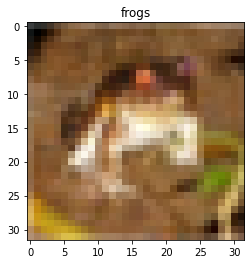

In [2]:
import matplotlib.pyplot as plt

label = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']

idx = 0

plt.imshow(X_train[idx])
plt.title(label[y_train[idx][0]])

### Data preparation

In [3]:
from tensorflow.keras.utils import to_categorical

X_train = X_train/255
X_test = X_test/255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## III.3 Model training from scratch

We will try to build a VGG model and train it from scratch, and then evaluate the performances.

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base model
base_model = VGG16(weights=None, include_top=False, 
             input_shape=X_train.shape[1:])

# add a flattening layer
# let's add a fully-connected layer to classify
x = base_model.get_layer('block3_pool').output
x = GlobalAveragePooling2D(name='GlobalPooling')(x)
x = Dense(512, activation='relu', name='fc1')(x)
predictions = Dense(10, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [5]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)        

We can add some `callbacks`, here `EarlyStopping` and `TensorBoard`.

TensorBoard allows to have a follow up of the training: the learning curve.

In [6]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard

# Define now our callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             TensorBoard(log_dir='./Graph')]

Now let's compile and fit our model on our dataset:

In [7]:
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=512, callbacks=callbacks)

Epoch 1/10
 1/98 [..............................] - ETA: 0s - loss: 2.3025 - accuracy: 0.1211WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
98/98 [==============================] - 6s 66ms/step - loss: 2.3905 - accuracy: 0.1377 - val_loss: 2.4415 - val_accuracy: 0.1011
Epoch 2/10
98/98 [==============================] - 6s 58ms/step - loss: 2.1223 - accuracy: 0.1991 - val_loss: 1.9851 - val_accuracy: 0.2361
Epoch 3/10
98/98 [==============================] - 6s 58ms/step - loss: 1.9830 - accuracy: 0.2589 - val_loss: 1.9294 - val_accuracy: 0.2714
Epoch 4/10
98/98 [==============================] - 6s 58ms/step - loss: 1.8078 - accuracy: 0.3321 - val_loss: 1.6857 - val_accuracy: 0.3597
Epoch 5/10
98/98 [==============================] - 6s 58ms/step - loss: 1.6

After 10 epochs and a lot of computational time, we have reached an accuracy of about 60 % on the validation dataset.


Then to use Tensorboard, just go back to your terminal and type
`tensorboard --logdir=Graph` where `Graph` is the path you defined in the tensorboard callback. You will see something like this:

![](images/tensorboardoutput.png)

## III.4 Model training with transfer learning

Now let's redo the same, but using transfer learning, with the pretrained network on the imagenet competition, using `weights='imagenet'`.

In [8]:
# create the base model
base_model = VGG16(weights='imagenet', include_top=False, 
             input_shape=X_train.shape[1:])

# add a flattening layer
# let's add a fully-connected layer to classify
x = base_model.get_layer('block3_pool').output
x = GlobalAveragePooling2D(name='GlobalPooling')(x)
x = Dense(512, activation='relu', name='fc1')(x)
predictions = Dense(10, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=512, callbacks=callbacks)

Epoch 1/10
98/98 [==============================] - 6s 61ms/step - loss: 6.7953 - accuracy: 0.1715 - val_loss: 2.0249 - val_accuracy: 0.2494
Epoch 2/10
98/98 [==============================] - 6s 58ms/step - loss: 2.2348 - accuracy: 0.2229 - val_loss: 2.0523 - val_accuracy: 0.3092
Epoch 3/10
98/98 [==============================] - 6s 58ms/step - loss: 1.8036 - accuracy: 0.3558 - val_loss: 1.8525 - val_accuracy: 0.3165
Epoch 4/10
98/98 [==============================] - 6s 58ms/step - loss: 1.5742 - accuracy: 0.4533 - val_loss: 1.1547 - val_accuracy: 0.5951
Epoch 5/10
98/98 [==============================] - 6s 57ms/step - loss: 1.2800 - accuracy: 0.5527 - val_loss: 1.1245 - val_accuracy: 0.6059
Epoch 6/10
98/98 [==============================] - 6s 58ms/step - loss: 1.0722 - accuracy: 0.6292 - val_loss: 1.0688 - val_accuracy: 0.6307
Epoch 7/10
98/98 [==============================] - 6s 57ms/step - loss: 0.9418 - accuracy: 0.6746 - val_loss: 0.7678 - val_accuracy: 0.7388
Epoch 8/10
98

The accuracy jumped up to 77 %, quite an improvement!

Finally you can try other famous DL architectures, and perhaps improve your performances.